In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the CSV file
netflix = pd.read_csv(r'C:\Users\Mhd Naqeeb\Downloads\Datavisulation\netflixData.csv')

In [3]:
 netflix.head(3)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"


In [4]:
netflix.shape

(5967, 13)

In [5]:
netflix.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [7]:
 netflix.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

Data Cleaning

In [8]:
# Check the column names
print(netflix.columns)

# Assuming the column names are 'Cast', 'Production Country', and 'Director':
netflix['Cast'].fillna('cast unavailable', inplace=True)
netflix['Production Country'].fillna('production country unavailable', inplace=True)
netflix['Director'].fillna('director unavailable', inplace=True)

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')


In [9]:
# Assuming the column names are 'Release Date', 'Rating', 'Duration', and 'Imdb Score':
netflix.dropna(subset=["Release Date", "Rating", "Duration", "Imdb Score"], inplace=True)
netflix.drop(["Date Added"], axis=1, inplace=True)

In [10]:
# Create the DataFrame
netflix = pd.DataFrame(data)

# Remove '/10' from 'Imdb Score' column
netflix['Imdb Score'] = netflix['Imdb Score'].str.replace('/10', '')

# Convert 'Imdb Score' to numeric
netflix['Imdb Score'] = netflix['Imdb Score'].apply(pd.to_numeric)

# Rename 'Release Date' to 'release_year'
netflix = netflix.rename(columns={'Release Date': 'release_year'})

# Convert 'release_year' to integer
netflix['release_year'] = netflix['release_year'].astype(int)

# Drop 'Date Added' column
netflix.drop(["Date Added"], axis=1, inplace=True)

# Print the resulting DataFrame
print(netflix)


                                Show Id                          Title   
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well  \
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   

                                         Description   
0  This docuseries takes a deep dive into the luc...  \
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   

                      Director   
0                         None  \
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   

                                           Genres   
0                                      Reality TV  \
1  Horror Movies, International Movies, Thrillers   
2             Documentaries, International Movies   

                          Cast Production Country  release_year Rating   
0                         None      United States     

In [11]:
 netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             3 non-null      object 
 1   Title               3 non-null      object 
 2   Description         3 non-null      object 
 3   Director            2 non-null      object 
 4   Genres              3 non-null      object 
 5   Cast                2 non-null      object 
 6   Production Country  3 non-null      object 
 7   release_year        3 non-null      int32  
 8   Rating              3 non-null      object 
 9   Duration            3 non-null      object 
 10  Imdb Score          3 non-null      float64
 11  Content Type        3 non-null      object 
dtypes: float64(1), int32(1), object(10)
memory usage: 404.0+ bytes


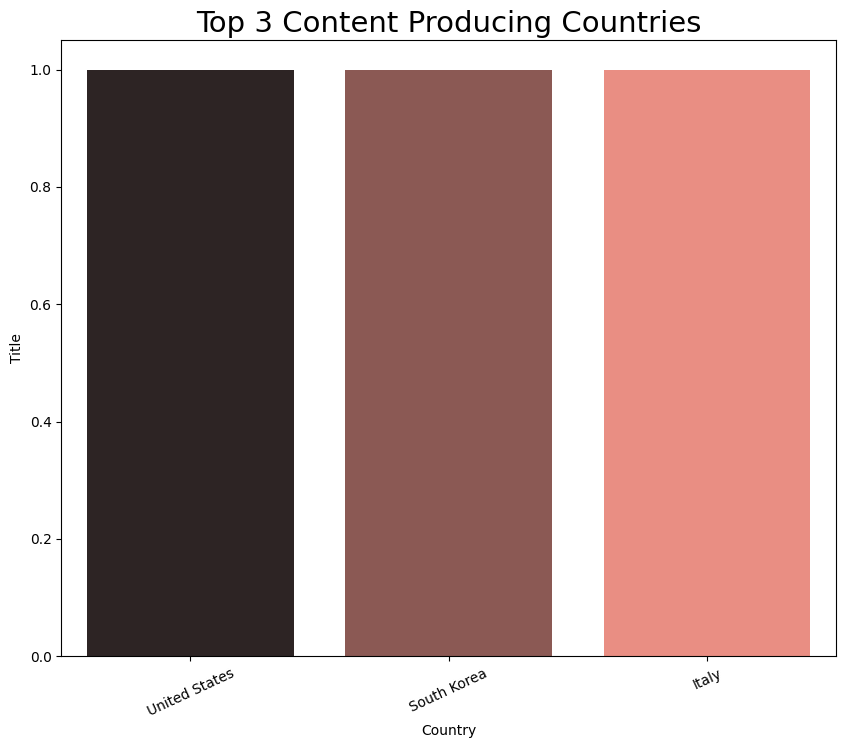

In [12]:
# Correct the column name to remove spaces
netflix = netflix.rename(columns={'Production Country': 'production_country'})

# Extract the countries from the 'production_country' column
Countries = netflix.set_index('Title').production_country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Filter out 'production country unavailable'
Countries = Countries[Countries != 'production country unavailable']

# Plot the count of content producing countries
plt.figure(figsize=(10, 8))
g = sns.countplot(x=Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('Top 3 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Title')
plt.xticks(rotation=25)
plt.show()

In [13]:
from mpl_toolkits.mplot3d import Axes3D

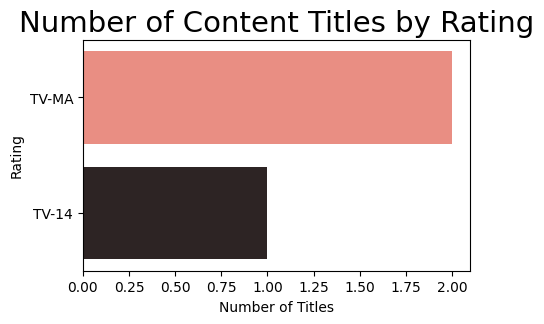

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(y='Rating', data=netflix, order=netflix['Rating'].value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Number of Content Titles by Rating', fontsize=21)
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

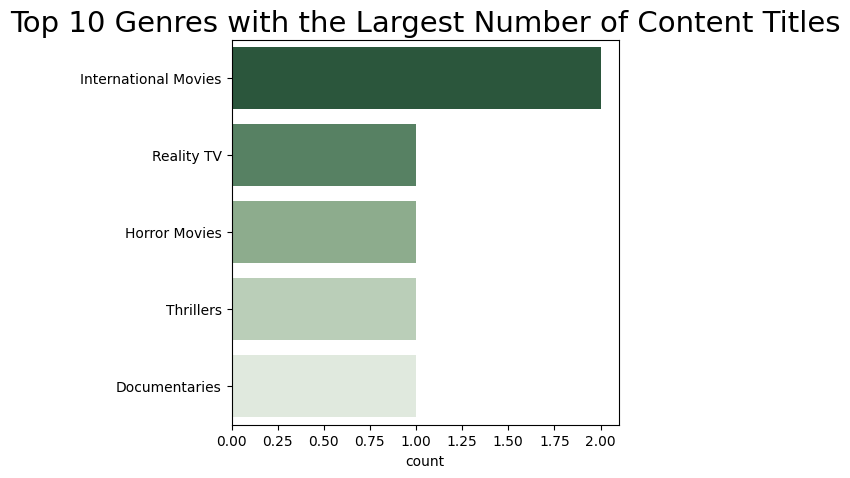

In [15]:
top_genres = netflix.set_index('Title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(5, 5))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='Greens_r', saturation=.4)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21)
plt.show()

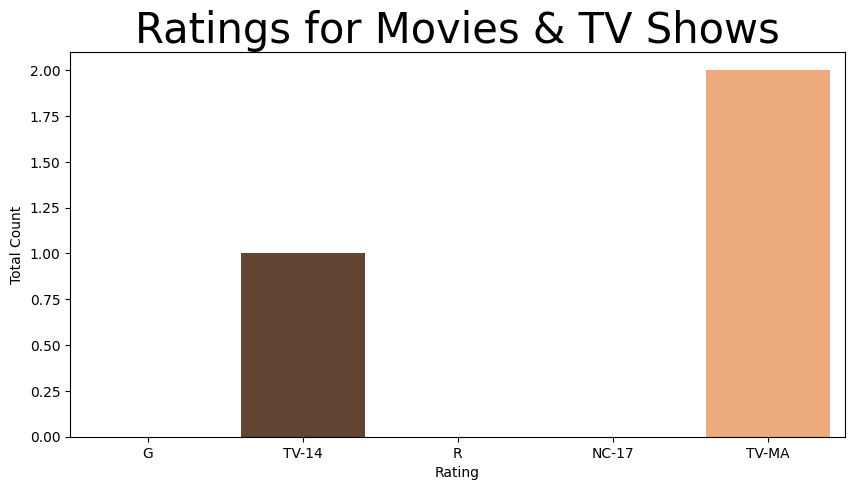

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['G', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10, 5))
g = sns.countplot(data=netflix, x='Rating', order=order, palette="copper")
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


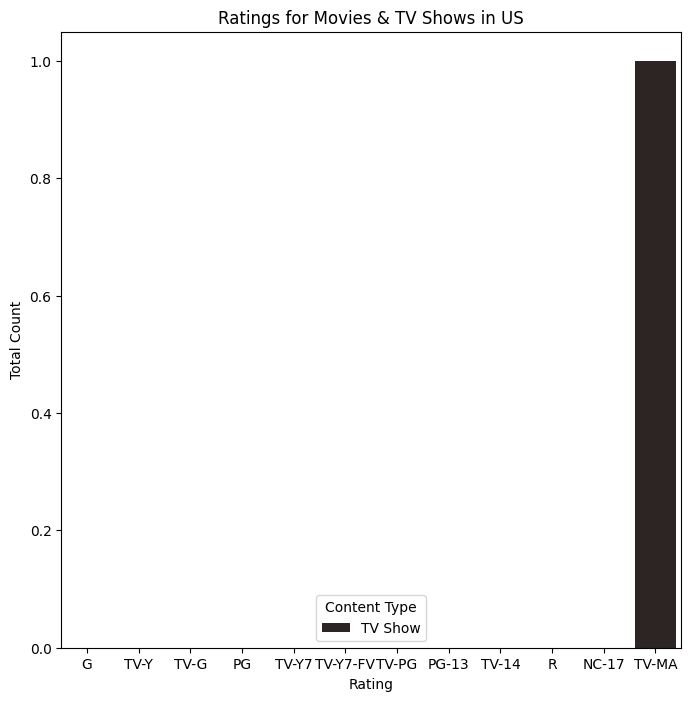

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for United States
US = netflix[netflix.production_country == "United States"]
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8, 8))
g = sns.countplot(data=US, x='Rating', hue='Content Type', order=order, palette="dark:brown")
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

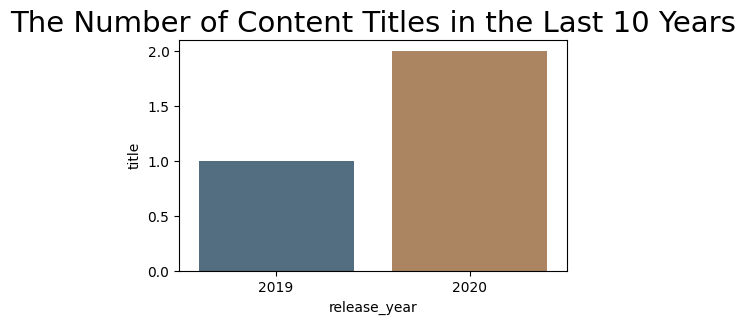

In [18]:
plt.figure(figsize=(5,3))
netflix_year = netflix['release_year'].value_counts()
netflix_year = pd.DataFrame(netflix_year).reset_index()
netflix_year.columns = ['release_year','title']
sns.barplot(x = 'release_year',y = 'title', data=netflix_year.head(10), saturation=.3)
plt.title('The Number of Content Titles in the Last 10 Years', fontsize=21);

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'production_country', 'release_year', 'Rating', 'Duration',
       'Imdb Score', 'Content Type'],
      dtype='object')


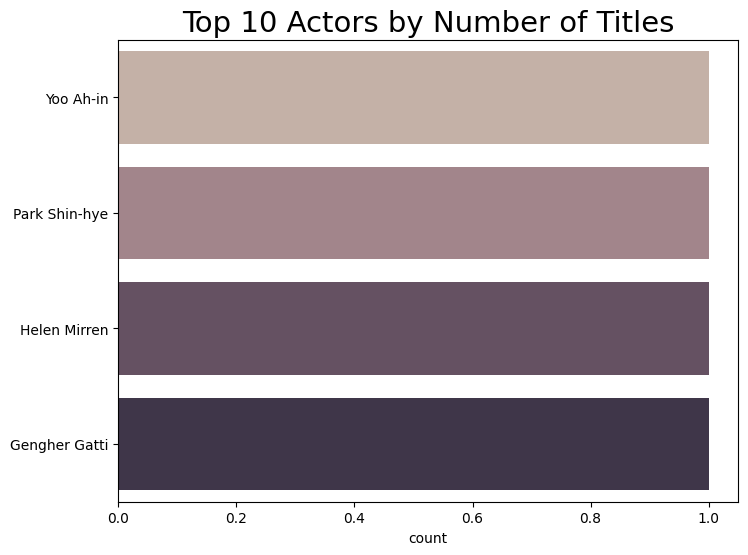

In [19]:
print(netflix.columns)

plt.figure(figsize=(8, 6))
netflix_cast = netflix[netflix['Cast'] != 'cast unavailable'].set_index('Title')['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=netflix_cast, order=netflix_cast.value_counts().index[:10], palette='magma_r', saturation=0.2)
plt.title('Top 10 Actors by Number of Titles', fontsize=21)
plt.show()


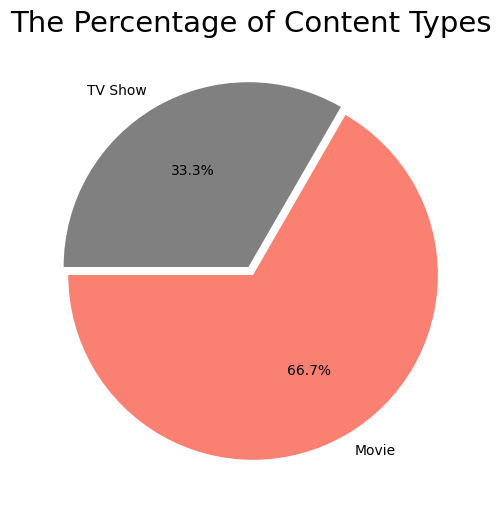

In [20]:
plt.figure(figsize=(10, 6))
plt.title("The Percentage of Content Types", fontsize=21)
g = plt.pie(netflix['Content Type'].value_counts(), explode=(0.025, 0.025), labels=netflix['Content Type'].value_counts().index, colors=['salmon', 'grey'], autopct='%1.1f%%', startangle=180)
plt.show()


Text(0.5, 1.0, 'Top 10 IMDb Scores')

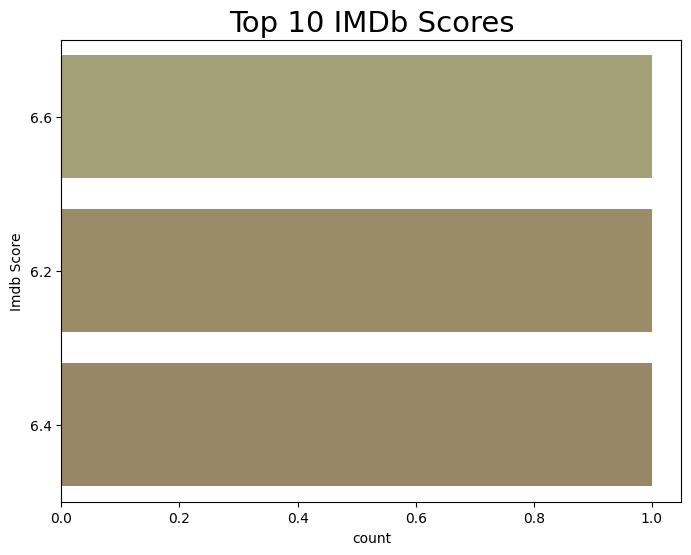

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Imdb Score', data=netflix, order=netflix['Imdb Score'].value_counts().index[:10], palette='Wistia', saturation=0.2)
plt.title('Top 10 IMDb Scores', fontsize=21)

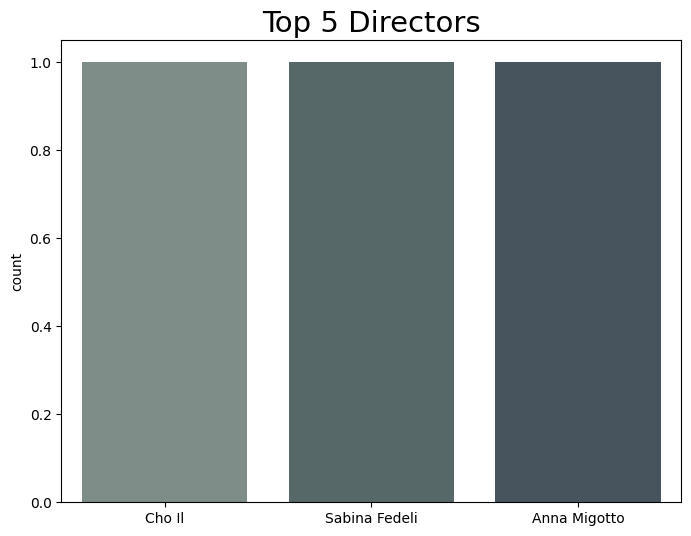

In [22]:
plt.figure(figsize=(8, 6))
netflix_directors = netflix[netflix['Director'] != 'director unavailable'].set_index('Title')['Director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(x=netflix_directors, order=netflix_directors.value_counts().index[:5], palette='crest', saturation=0.2)
plt.title('Top 5 Directors', fontsize=21)
plt.show()

Conclusions
The Netflix data visualization project was undertaken to showcase skills and knowledge in data analysis, visualization, and Python programming. The objective of the project was to explore and visualize the Netflix dataset to gain insights into the content available on the platform.